# Imports

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from statistics import mean
plt.rcParams['figure.figsize'] = [18, 12]

# Functions

## Function for plotting y and y_hat

In [21]:
def plot_y_hat_y_real(hat, real):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, len(real), 1)
    # minor_ticks = np.arange(0, 1, 0.01)
    y_ticks = np.arange(min(real), 1, 0.01)

    ax.set_xticks(major_ticks)
    # ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(y_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    # ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.8)
    
    plt.plot(hat,'ro', label='y_hat',markersize=3)
    plt.plot(real, 'g*', label='y_real',markersize=3)
    
    plt.plot([0, len(real)],[0,0], color='black', lw=1)
    
    plt.show()

# Fake data

## Overfited - 4 different nets

### Open

In [14]:
with open('fake_data_overfit.pickle', 'rb') as handle:
    result = pickle.load(handle)

In [15]:
result.reset_index(inplace=True)

In [16]:
result.head()

,index,num_epochs,learning_rates,input_size,hidden_size,fc_layer_size,losses_train,losses_val,train_y_real,train_y_hat,test_y_hat,test_y_real
0,0,300,0.001,60,8,8,"[836.5452453613282, 796.1788600376674, 734.622...","[855.7819519042969, 799.3837415907118, 722.602...","[-31.37710952758789, -32.2651481628418, -29.76...","[-31.239484786987305, -32.126277923583984, -29...","[-30.242305755615234, -29.634536743164062, -28...","[-29.2078857421875, -26.24937629699707, -29.99..."
1,0,300,0.001,60,8,64,"[844.6887154715401, 677.5739541190011, 296.628...","[834.9215562608507, 522.9233907063802, 139.812...","[-31.37710952758789, -32.2651481628418, -29.76...","[-31.89274024963379, -32.14913558959961, -30.1...","[-30.79401206970215, -28.30344009399414, -30.9...","[-29.2078857421875, -26.24937629699707, -29.99..."
2,0,300,0.001,60,64,8,"[822.471142578125, 655.7645555768694, 474.6818...","[780.2558237711588, 591.8375820583767, 407.197...","[-31.37710952758789, -32.2651481628418, -29.76...","[-31.686750411987305, -32.09550857543945, -29....","[-30.174057006835938, -28.213401794433594, -30...","[-29.2078857421875, -26.24937629699707, -29.99..."
3,0,300,0.001,60,64,64,"[620.1121488298688, 41.09711304674191, 4.76758...","[217.22574064466687, 5.2187168738390834, 5.732...","[-31.37710952758789, -32.2651481628418, -29.76...","[-30.739700317382812, -32.27229690551758, -29....","[-32.05950164794922, -26.95046043395996, -29.2...","[-29.2078857421875, -26.24937629699707, -29.99..."


### Mean loss

In [27]:
result['mean_train_loss'] = result['losses_train'].apply(mean)
result['mean_validation_loss'] = result['losses_val'].apply(mean)

<AxesSubplot:>

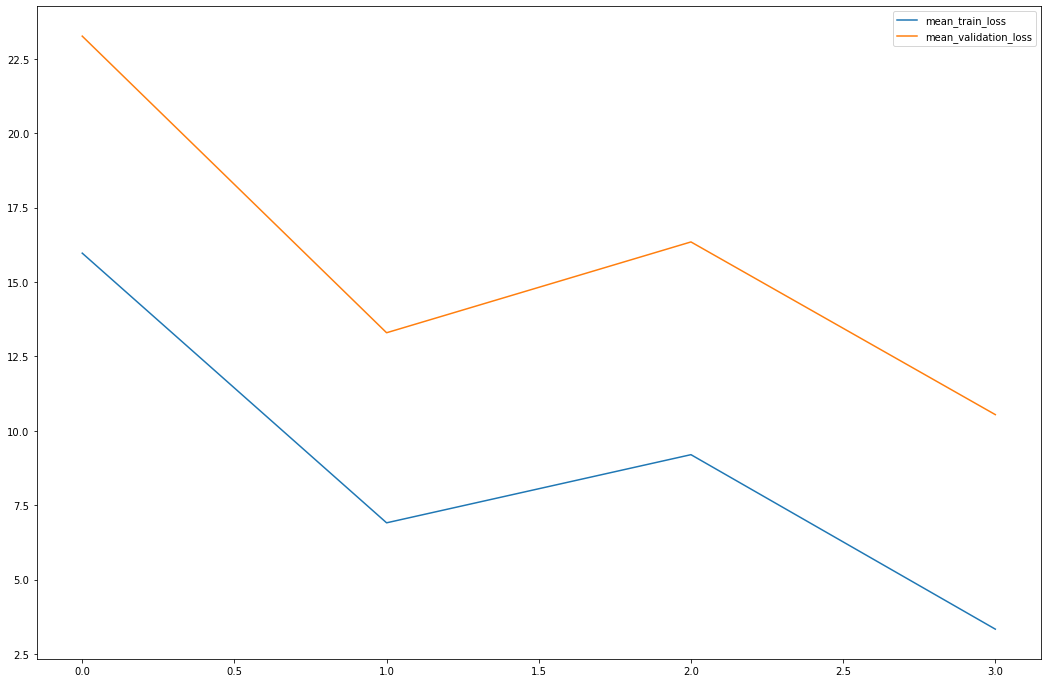

In [12]:
result[['mean_train_loss','mean_validation_loss']].plot()

In [8]:
# result['mean_train_loss'].hist(bins=81)

In [9]:
# result['mean_validation_loss'].hist(bins=81)

In [10]:
# result[result['mean_validation_loss']<0.00379]

### Plot test y_hat and test y_real

In [18]:
result.iloc[[3]]

,level_0,index,num_epochs,learning_rates,input_size,hidden_size,fc_layer_size,losses_train,losses_val,train_y_real,train_y_hat,test_y_hat,test_y_real,mean_train_loss,mean_validation_loss
3,3,0,300,0.001,60,64,64,"[620.1121488298688, 41.09711304674191, 4.76758...","[217.22574064466687, 5.2187168738390834, 5.732...","[-31.37710952758789, -32.2651481628418, -29.76...","[-30.739700317382812, -32.27229690551758, -29....","[-32.05950164794922, -26.95046043395996, -29.2...","[-29.2078857421875, -26.24937629699707, -29.99...",3.331464,10.544759


In [29]:
# result.iloc[[0]]['losses_train'].to_list()[0]

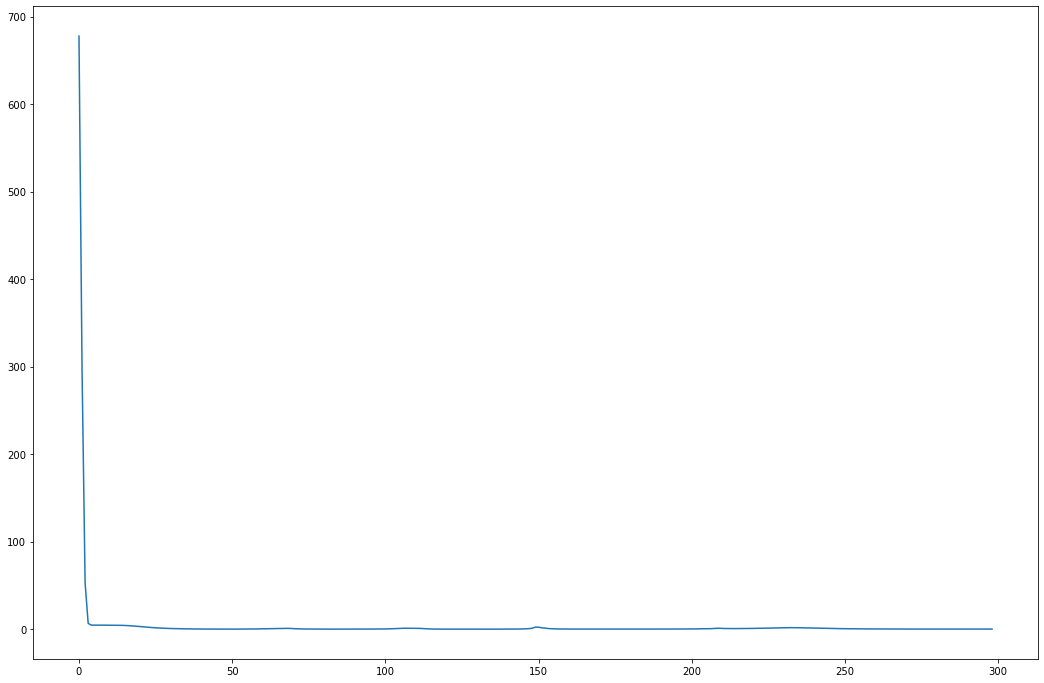

In [23]:
x = result.iloc[[1]]['losses_train'].to_list()[0][1:]
# x2 = result.iloc[[75]]['losses_val'].to_list()[0]
plt.plot(x)

### Plot the y and y hat

In [20]:
real

[-29.2078857421875,
 -26.24937629699707,
 -29.995866775512695,
 -30.095863342285156,
 -32.07622528076172,
 -31.89113998413086,
 -29.868227005004883,
 -25.460962295532227,
 -26.685997009277344,
 -31.396814346313477,
 -28.895456314086914,
 -29.76964569091797]

In [ ]:
hat = result.iloc[[3]]['test_y_hat'].to_list()[0][:100]
real = result.iloc[[3]]['test_y_real'].to_list()[0][:100]

In [ ]:
plot_y_hat_y_real(hat, real)

## Train y_hat and train y_real

In [ ]:
hat = result.iloc[[75]]['train_y_hat'].to_list()[0][:100]
real = result.iloc[[75]]['train_y_real'].to_list()[0][:100]

plot_y_hat_y_real(hat, real)

In [ ]:
with open('grid_search_results2.pickle', 'rb') as handle:
    result2 = pickle.load(handle)
result2